# Task2. Algorithms for unconstrained nonlinear optimization. Direct methods
Alexandra Matveeva, J4134c

In [1]:
# eps = 0.001 
# one-dimensional methods: 
#      - exhaustive search (brute-force search)
#      - dichotomy
#      - golden section search

In [2]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy
from scipy import optimize
from functools import partial

In [3]:
def cube_func(x, f_count):
    f_count += 1
    return [x ** 3, f_count]

In [4]:
def abs_func(x, f_count):
    f_count += 1
    return [math.fabs(x - 0.2), f_count]

In [5]:
def sin_func(x, f_count):
    f_count += 1
    return [x * np.sin(1/x), f_count]

In [6]:
eps = 1e-3

In [7]:
# exhaustive search method (brute-force search)
def exhaustive_method(a, b, func):
    f_count = 0
    it = 1 #number of iterations
    n = int((b - a) / eps)
    arg = a
    f_min, f_count = func(a, f_count) # k = 0
    for k in range(1, n):
        it += 1
        x = a + k * (b - a) / n
        f, f_count = func(x, f_count)
        if(f <= f_min):
            arg = x
            f_min = f
    print(f'{func}:\t ','arg = {:.3f} Minimum: {:.3f} Number of f-calculations: {:.0f} Iterations: {:.0f}'.format(arg, f_min, f_count, it))
#     print('x = ', arg)
#     print('f(x) = ', f_min)

In [8]:
# dichotomy 
def dichotomy(a, b, func):
    f_count = 0 #number of function calculations
    it = 1
    delta = eps / 2
    x1 = (a + b - delta) / 2
    x2 = (a + b + delta) / 2
    f1, f_count = func(x1, f_count)
    f2, f_count = func(x2, f_count)
    while(abs(a - b) >= eps):
        it += 1
        if(f1 <= f2):
            b = x2
        else:
            a = x1
        x1 = (a + b - delta) / 2
        x2 = (a + b + delta) / 2
        f1, f_count = func(x1, f_count)
        f2, f_count = func(x2, f_count)
    x = (x1 + x2) / 2
    f_min, f_count = func(x, f_count)
    print(f'{func}:\t ','arg = {:.3f} Minimum: {:.3f} Number of f-calculations: {:.0f} Iterations: {:.0f}'.format(x, f_min, f_count, it))
#     print('x = ', x)
#     print('f(x) = ', f_min)

In [9]:
# golden section search
def goldenSection_func(a, b, func):
    f_count = 0 # number of function calculations
    it = 1 # number of iterations
    alpha1 = (3 - 5 ** 0.5) / 2
    alpha2 = (5 ** 0.5 - 3) / 2
    
    x1 = a + alpha1 * (b - a)
    x2 = b + alpha2 * (b - a)
    f_x1, f_count = func(x1, f_count)
    f_x2, f_count = func(x2, f_count)
    
    while(abs(a - b) >= eps):
        it += 1
        f_x1, f_count = func(x1, f_count)
        f_x2, f_count = func(x2, f_count)
        
        if(f_x1 <= f_x2):
            b = x2
            x2 = x1
            x1 = a + alpha1 * (b - a)
        else:
            a = x1 
            x1 = x2
            x2 = b + alpha2 * (b - a)
            
    x = (x1 + x2) / 2
    f_min, f_count = func(x, f_count)
    print(f'{func}:\t ','arg = {:.3f} Minimum: {:.3f} Number of f-calculations: {:.0f} Iterations: {:.0f}'.format(x, f_min, f_count, it))
#     print('x = ', x)
#     print('f(x) = ', f_min)

In [10]:
print('Exhaustive search (Brute-force)')
exhaustive_method(0, 1, cube_func)
exhaustive_method(0, 1, abs_func)
exhaustive_method(0.01, 1, sin_func)

print('\nDichotomy search method')
dichotomy(0, 1, cube_func)
dichotomy(0, 1, abs_func)
dichotomy(0.01, 1, sin_func)

print('\nGolden section search method')
goldenSection_func(0, 1, cube_func)
goldenSection_func(0, 1, abs_func)
goldenSection_func(0.01, 1, sin_func)

Exhaustive search (Brute-force)
<function cube_func at 0x000001CE316621F0>:	  arg = 0.000 Minimum: 0.000 Number of f-calculations: 1000 Iterations: 1000
<function abs_func at 0x000001CE316623A0>:	  arg = 0.200 Minimum: 0.000 Number of f-calculations: 1000 Iterations: 1000
<function sin_func at 0x000001CE31662550>:	  arg = 0.223 Minimum: -0.217 Number of f-calculations: 990 Iterations: 990

Dichotomy search method
<function cube_func at 0x000001CE316621F0>:	  arg = 0.000 Minimum: 0.000 Number of f-calculations: 25 Iterations: 12
<function abs_func at 0x000001CE316623A0>:	  arg = 0.200 Minimum: 0.000 Number of f-calculations: 25 Iterations: 12
<function sin_func at 0x000001CE31662550>:	  arg = 0.223 Minimum: -0.217 Number of f-calculations: 25 Iterations: 12

Golden section search method
<function cube_func at 0x000001CE316621F0>:	  arg = 0.000 Minimum: 0.000 Number of f-calculations: 33 Iterations: 16
<function abs_func at 0x000001CE316623A0>:	  arg = 0.200 Minimum: 0.000 Number of f-ca

In [11]:
alpha, beta = random.random(), random.random()
print(alpha, beta)

0.2509682785643582 0.9997821679109934


In [12]:
# noisy data generation
x = []
yk = []
y_init = []
for k in range(101):
    x.append(k / 100)
    y_init.append(alpha * x[k] + beta)
    yk.append(y_init[k] + np.random.normal(0, 1))

In [13]:
# linear approximation function

def linear_approx_func(x, a, b):
    y = []
    for i in range(101):
        y.append(a * x[i] + b)
    return np.array(y)

In [14]:
# rational approximation function
def rational_approx_func(x, a, b):
    y = []
    for i in range(101):
        y.append(a / (1 + b * x[i]))
    return np.array(y)

In [15]:
def least_squares_linear(params, y_f, x):
    a, b = params
    return np.sum((linear_approx_func(x, a, b) - y_f) ** 2)

In [16]:
def least_squares_rational(params, y_f, x):
    a, b = params
    return np.sum((rational_approx_func(x, a, b) - y_f) ** 2)

In [33]:
# linear optimization brute
a_brute_lin, b_brute_lin = scipy.optimize.brute(least_squares_linear, [[0, 1],[0, 1]], args=(yk, x))
print('Linear optimization (exhaustive search method):\n', a_brute_lin, b_brute_lin)

# linear optimization Gauss method
powell_lin = scipy.optimize.minimize(least_squares_linear, [0, 0], args=(yk, x), method='Powell', tol=eps)
print('\nLinear optimization (Gauss search method):\n', powell_lin)

# linear optimization Nelder-Mead
nelderMead_lin = scipy.optimize.minimize(least_squares_linear, [0, 0], args=(yk, x), method='Nelder-Mead', tol=eps)
print('\nLinear optimization (Nelder-Mead method):\n', nelderMead_lin)


Linear optimization (exhaustive search method):
 0.16105526949916232 0.9060831780986566

Linear optimization (Gauss search method):
    direc: array([[ 0.        ,  1.        ],
       [-0.96656899,  0.4832845 ]])
     fun: 116.56589616963855
 message: 'Optimization terminated successfully.'
    nfev: 95
     nit: 3
  status: 0
 success: True
       x: array([0.16102812, 0.90608235])

Linear optimization (Nelder-Mead method):
  final_simplex: (array([[0.16887875, 0.90186999],
       [0.16909776, 0.90227826],
       [0.16897877, 0.90262722]]), array([116.5664336 , 116.56646059, 116.56646618]))
           fun: 116.56643360410243
       message: 'Optimization terminated successfully.'
          nfev: 63
           nit: 32
        status: 0
       success: True
             x: array([0.16887875, 0.90186999])


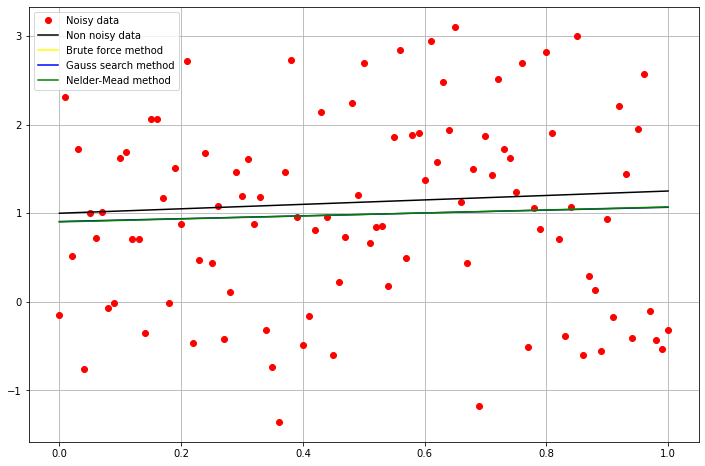

In [34]:
y_linear_opt_brute = []
for i in range(101):
    y_linear_opt_brute.append(a_brute_lin * x[i] + b_brute_lin)

y_linear_opt_powell = []
for i in range(101):
    y_linear_opt_powell.append(powell_lin.x[0] * x[i] + powell_lin.x[1])
    
y_linear_opt_nelderMead = []
for i in range(101):
    y_linear_opt_nelderMead.append(nelderMead_lin.x[0] * x[i] + nelderMead_lin.x[1])
    
plt.figure(figsize=(12, 8))
plt.grid()
plt.plot(x, yk, 'ro')
plt.plot(x, y_init, color='black')
plt.plot(x, y_linear_opt_brute, color='yellow')
plt.plot(x, y_linear_opt_powell, color='blue')
plt.plot(x, y_linear_opt_nelderMead, color='green')
plt.legend(['Noisy data', 'Non noisy data', 'Brute force method', 'Gauss search method', 'Nelder-Mead method'])
plt.show()

In [35]:
# rational optimization brute
a_brute_rat, b_brute_rat = scipy.optimize.brute(least_squares_rational, [[0, 1],[0, 1]], args=(yk, x))
print('Rational optimization (exhaustive search method):\n', a_brute_rat, b_brute_rat)

# rational optimization Gauss method
powell_rat = scipy.optimize.minimize(least_squares_rational, [0, 0], args=(yk, x), method='Powell', tol=eps)
print('\nRational optimization (Gauss search method):\n', powell_rat)

# rational optimization Nelder-Mead
nelderMead_rat = scipy.optimize.minimize(least_squares_rational, [0, 0], args=(yk, x), method='Nelder-Mead', tol=eps)
print('\nRationl optimization (Nelder-Mead method):\n', nelderMead_rat)


Rational optimization (exhaustive search method):
 0.9314970841167296 -0.11000539508558971

Rational optimization (Gauss search method):
    direc: array([[1., 0.],
       [0., 1.]])
     fun: 116.70314758534197
 message: 'Optimization terminated successfully.'
    nfev: 43
     nit: 2
  status: 0
 success: True
       x: array([ 0.97720661, -0.05035639])

Rationl optimization (Nelder-Mead method):
  final_simplex: (array([[ 0.93129152, -0.11007223],
       [ 0.93183923, -0.10957998],
       [ 0.93145558, -0.11038122]]), array([116.62872499, 116.62872709, 116.62872835]))
           fun: 116.62872499243304
       message: 'Optimization terminated successfully.'
          nfev: 118
           nit: 62
        status: 0
       success: True
             x: array([ 0.93129152, -0.11007223])


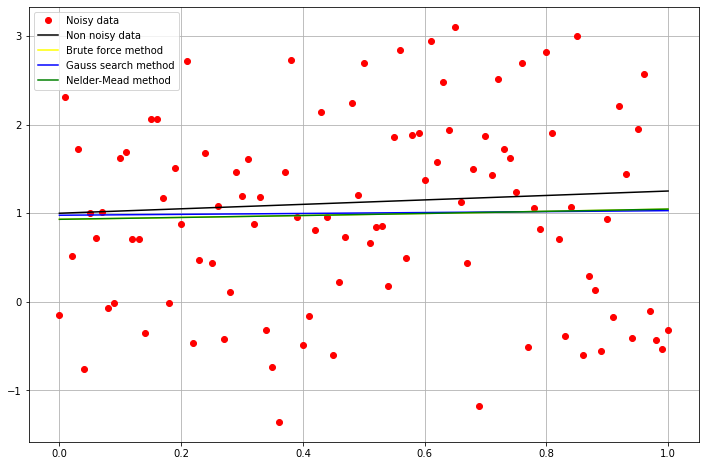

In [40]:
y_rational_opt_brute = []
for i in range(101):
    y_rational_opt_brute.append(a_brute_rat / (1 + b_brute_rat * x[i]))

y_rational_opt_powell = []
for i in range(101):
    y_rational_opt_powell.append(powell_rat.x[0] / (1 + powell_rat.x[1] * x[i]))
    
y_rational_opt_nelderMead = []
for i in range(101):
    y_rational_opt_nelderMead.append(nelderMead_rat.x[0] / (1 + nelderMead_rat.x[1] * x[i]))
    
plt.figure(figsize=(12, 8))
plt.grid()
plt.plot(x, yk, 'ro')
plt.plot(x, y_init, color='black')
plt.plot(x, y_rational_opt_brute, color='yellow')
plt.plot(x, y_rational_opt_powell, color='blue')
plt.plot(x, y_rational_opt_nelderMead, color='green')
plt.legend(['Noisy data', 'Non noisy data', 'Brute force method', 'Gauss search method', 'Nelder-Mead method'])
plt.show()

In [22]:
def linear_approx(x, a, b):
    def linear(x, a, b):
        return a*x + b
    return np.array(list(map(partial(linear, a=a, b=b), x)))


def rational_approx(x, a, b):
    def rational(x, a, b):
        denominator = 1 + x * b
        return a / denominator
    return np.array(list(map(partial(rational, a=a, b=b), x)))


def cost_func(params, gt, x, func_name):
    a, b = params
    if func_name == 'linear':
        return sum((gt - linear_approx(x, a, b))**2)

    value = sum((gt - rational_approx(x, a, b))**2)
    return value

In [26]:
res_search_rational = scipy.optimize.brute(cost_func, [[0, 1], [0, 1]], args=(yk, x, 'rational'))
res_gauss_rational = scipy.optimize.minimize(cost_func, [0, 0], args=(yk, x, 'rational'), method='Powell', tol=eps, bounds=[[-1, 1], [-1, 1]])
res_nelder_mead_rational = scipy.optimize.minimize(cost_func, [0, 0], args=(yk, x, 'rational'), method='Nelder-Mead', tol=eps, bounds=[[-1, 1], [-1, 1]])

print(res_search_rational)
print('*' * 80)
print(res_gauss_rational)
print('*' * 80)
print(res_nelder_mead_rational)

[ 0.93149708 -0.1100054 ]
********************************************************************************
   direc: array([[1., 0.],
       [0., 1.]])
     fun: 116.67753463594893
 message: 'Optimization terminated successfully.'
    nfev: 43
     nit: 2
  status: 0
 success: True
       x: array([ 0.96838803, -0.06165409])
********************************************************************************
 final_simplex: (array([[ 0.93129152, -0.11007223],
       [ 0.93183923, -0.10957998],
       [ 0.93145558, -0.11038122]]), array([116.62872499, 116.62872709, 116.62872835]))
           fun: 116.62872499243298
       message: 'Optimization terminated successfully.'
          nfev: 118
           nit: 62
        status: 0
       success: True
             x: array([ 0.93129152, -0.11007223])


D:\Anaconda\lib\site-packages\scipy\optimize\_minimize.py:535: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  warn('Method %s cannot handle constraints nor bounds.' % method,


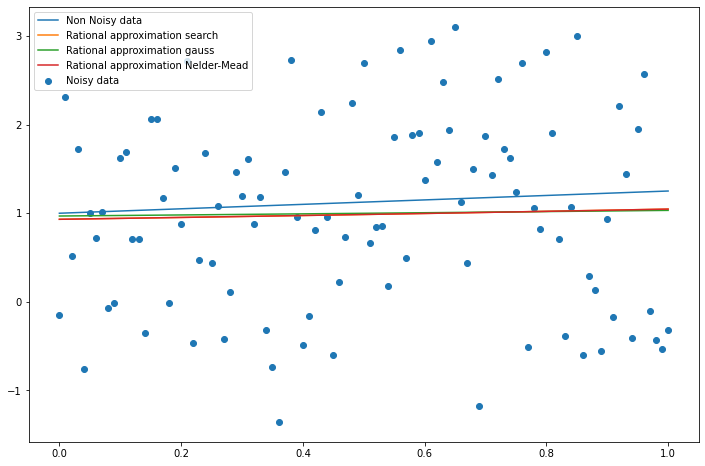

In [28]:
plt.figure(figsize=(12, 8))
plt.plot(x, y_init)
plt.scatter(x, yk)
plt.plot(x, rational_approx(x, *res_search_rational))
plt.plot(x, rational_approx(x, *res_gauss_rational.x))
plt.plot(x, rational_approx(x, *res_nelder_mead_rational.x))
plt.legend(['Non Noisy data', 'Rational approximation search',
           'Rational approximation gauss', 'Rational approximation Nelder-Mead', 'Noisy data'])
plt.show()